Load CSVs while reducing number of rows to reduce memory usage while maintaing class distribution

In [ ]:
import pandas as pd
import numpy as np

def reduce_memory(df):
    """Optimize memory usage by downcasting numeric types and converting object columns to category."""
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and col_type != 'category':
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                df[col] = pd.to_numeric(df[col], downcast='float')
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization: {end_mem:.2f} MB')
    print(f'Reduced by {(start_mem - end_mem) / start_mem:.1%}')

    return df

def load_and_reduce(file_path, chunk_size=100000, reduction_frac=0.5):
    """Load dataset in chunks, optimize memory, and reduce rows while maintaining class balance."""
    chunks = pd.read_csv(file_path, chunksize=chunk_size, low_memory=False)
    df_chunks = [reduce_memory(chunk) for chunk in chunks]  # Optimize each chunk
    df = pd.concat(df_chunks, axis=0)  # Merge chunks into a full dataframe

    # Reduce dataset while maintaining class distribution
    df_reduced = df.groupby("label", group_keys=False).apply(lambda x: x.sample(frac=reduction_frac, random_state=42))

    # Save the reduced dataset
    reduced_file_path = f"00_dataset/with_stopwords/reduced_{file_path.split('/')[-1]}"
    df_reduced.to_csv(reduced_file_path, index=False)

    print(f"\nReduced {file_path}:")
    print(df_reduced["label"].value_counts())

    return df_reduced

# Paths to datasets
file_paths = {
    "train": "00_dataset/with_stopwords/train_features_sw.csv",
    "val": "00_dataset/with_stopwords/val_features_sw.csv",
    "test": "00_dataset/with_stopwords/test_features_sw.csv"
}

# Generate respective DataFrame
df_train_reduced = load_and_reduce(file_paths["train"])
df_val_reduced = load_and_reduce(file_paths["val"])
df_test_reduced = load_and_reduce(file_paths["test"])


Initial memory usage: 3822.33 MB
Memory usage after optimization: 1909.73 MB
Reduced by 50.0%
Initial memory usage: 3822.33 MB
Memory usage after optimization: 1909.64 MB
Reduced by 50.0%
Initial memory usage: 3822.33 MB
Memory usage after optimization: 1909.64 MB
Reduced by 50.0%
Initial memory usage: 3822.33 MB
Memory usage after optimization: 1909.64 MB
Reduced by 50.0%
Initial memory usage: 990.75 MB
Memory usage after optimization: 495.00 MB
Reduced by 50.0%


<ipython-input-2-eb0f6717902d>:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduced = df.groupby("label", group_keys=False).apply(lambda x: x.sample(frac=reduction_frac, random_state=42))



Reduced /content/drive/My Drive/Johnathan/train_features_sw.csv:
label
0    184806
1     28154
Name: count, dtype: int64
Initial memory usage: 2325.73 MB
Memory usage after optimization: 1161.94 MB
Reduced by 50.0%


<ipython-input-2-eb0f6717902d>:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduced = df.groupby("label", group_keys=False).apply(lambda x: x.sample(frac=reduction_frac, random_state=42))



Reduced /content/drive/My Drive/Johnathan/val_features_sw.csv:
label
0    26401
1     4022
Name: count, dtype: int64
Initial memory usage: 3822.33 MB
Memory usage after optimization: 1909.64 MB
Reduced by 50.0%
Initial memory usage: 829.14 MB
Memory usage after optimization: 414.24 MB
Reduced by 50.0%


<ipython-input-2-eb0f6717902d>:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduced = df.groupby("label", group_keys=False).apply(lambda x: x.sample(frac=reduction_frac, random_state=42))



Reduced /content/drive/My Drive/Johnathan/test_features_sw.csv:
label
0    52802
1     8044
Name: count, dtype: int64


In [ ]:
df_train_reduced.head()
df_test_reduced.head()
df_val_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,sentiment_score,vader_score,review_length,exclamation_count,question_count,uppercase_ratio,duplicate_word_count,emoji_count,avg_word_length,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.725000,0.9693,26,3,0,0.111111,3,0,3.884615,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068333,0.1484,54,0,0,0.056680,21,0,3.592592,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201161,0.9198,51,3,0,0.026201,21,0,3.509804,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.212113,0.9751,138,2,0,0.026846,78,0,3.326087,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.583333,0.9859,88,3,0,0.048276,29,0,3.954545,0


Loading reduced CSVs to perform feature scaling and training

In [ ]:
import pandas as pd

new_train = pd.read_csv("00_dataset/with_stopwords/reduced_train_features_sw.csv") 
new_test = pd.read_csv("00_dataset/with_stopwords/reduced_test_features_sw.csv") 
new_val = pd.read_csv("00_dataset/with_stopwords/reduced_val_features_sw.csv")

# Separate into X and y
X_train = new_train.drop(columns=["label"])
y_train = new_train["label"]

X_test = new_test.drop(columns=["label"])
y_test = new_test["label"]

X_val = new_val.drop(columns=["label"])
y_val = new_val["label"]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling using MinMaxScaler
ct = ColumnTransformer(transformers=[('MinMaxScaler', MinMaxScaler(), ['sentiment_score', 'vader_score', 'review_length', 'exclamation_count', 'question_count', 'uppercase_ratio', 'duplicate_word_count', 'emoji_count', 'avg_word_length'])], remainder='passthrough')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)
X_val_scaled = ct.transform(X_val)

In [ ]:
# Check class distribution after split
print("Train Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation Class Distribution:\n", y_val.value_counts(normalize=True))
print("\nTest Class Distribution:\n", y_test.value_counts(normalize=True))


Train Class Distribution:
 label
0    0.867797
1    0.132203
Name: proportion, dtype: float64

Validation Class Distribution:
 label
0    0.867797
1    0.132203
Name: proportion, dtype: float64

Test Class Distribution:
 label
0    0.867797
1    0.132203
Name: proportion, dtype: float64


Random Forest (MinMaxScaler + SMOTE) with Validation Set

Validation Set
Validation Accuracy: 0.8582651283568353
Balanced Validation Accuracy: 0.5177962298604221
ROC-AUC Score: 0.6708830335469226

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     26401
           1       0.30      0.05      0.09      4022

    accuracy                           0.86     30423
   macro avg       0.59      0.52      0.51     30423
weighted avg       0.80      0.86      0.81     30423



27877

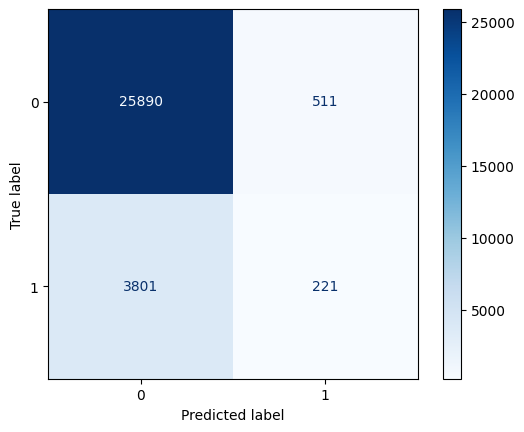

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy = "auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

rf_model.fit(X_train_resampled, y_train_resampled)
import joblib

# Save the trained model to a file
joblib.dump(rf_model, '/content/drive/My Drive/Johnathan/rf_model.joblib')

print("Validation Set")
# Predict on the validation set
y_val_pred = rf_model.predict(X_val_scaled)

# Compute validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
bal_val_accuracy = balanced_accuracy_score(y_val, y_val_pred)
print(f"Balanced Validation Accuracy: {bal_val_accuracy}")
y_val_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba)}")

# Print Classification Report
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

Random Forest (MinMaxScaler + SMOTE) with Test Set

Test Set
Test Accuracy: 0.8599250567005227
Balanced Test Accuracy: 0.52212471571502
ROC-AUC Score: 0.676415474426279

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     52802
           1       0.34      0.06      0.11      8044

    accuracy                           0.86     60846
   macro avg       0.61      0.52      0.52     60846
weighted avg       0.80      0.86      0.82     60846



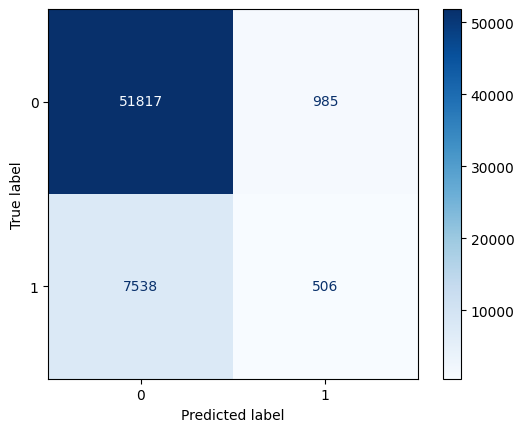

In [ ]:
print("Test Set")
# Predict on the Test set
y_test_pred = rf_model.predict(X_test_scaled)

# Compute validation accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
bal_test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print(f"Balanced Test Accuracy: {bal_test_accuracy}")
y_test_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba)}")

# Print Classification Report
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")